# 🌟 **Practice problem -------> Transfer Learning-------> Part 1----->Feature Extraction**
**Aim:**
To build a model using transfer learning, for the dataset [10_food_classes_10_percent](https:////storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip).
The model will be built with the `MobileNetV2` architecture feature extraction [(mobilenet_v2_100_224/feature_vector)](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5) from TensorFlow Hub.

## **Getting the data**

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-07-08 07:07:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.0MB/s    in 8.3s    

2023-07-08 07:07:15 (19.5 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
!unzip /content/10_food_classes_10_percent.zip

Archive:  /content/10_food_classes_10_percent.zip
   creating: 10_food_classes_10_percent/
  inflating: __MACOSX/._10_food_classes_10_percent  
   creating: 10_food_classes_10_percent/test/
  inflating: __MACOSX/10_food_classes_10_percent/._test  
   creating: 10_food_classes_10_percent/train/
  inflating: __MACOSX/10_food_classes_10_percent/._train  
   creating: 10_food_classes_10_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_10_percent/test/._ice_cream  
   creating: 10_food_classes_10_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_curry  
   creating: 10_food_classes_10_percent/test/steak/
  inflating: __MACOSX/10_food_classes_10_percent/test/._steak  
   creating: 10_food_classes_10_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_10_percent/test/._sushi  
   creating: 10_food_classes_10_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_wings  
   creating: 10_food_class

### **Walking through the data**

In [3]:
import os
for directory, folder, filename in os.walk('10_food_classes_10_percent'):
  print(f"There are {len(folder)} folders and {len(filename)} images in {directory}")

There are 2 folders and 0 images in 10_food_classes_10_percent
There are 10 folders and 0 images in 10_food_classes_10_percent/train
There are 0 folders and 75 images in 10_food_classes_10_percent/train/ramen
There are 0 folders and 75 images in 10_food_classes_10_percent/train/chicken_wings
There are 0 folders and 75 images in 10_food_classes_10_percent/train/pizza
There are 0 folders and 75 images in 10_food_classes_10_percent/train/grilled_salmon
There are 0 folders and 75 images in 10_food_classes_10_percent/train/steak
There are 0 folders and 75 images in 10_food_classes_10_percent/train/chicken_curry
There are 0 folders and 75 images in 10_food_classes_10_percent/train/ice_cream
There are 0 folders and 75 images in 10_food_classes_10_percent/train/sushi
There are 0 folders and 75 images in 10_food_classes_10_percent/train/hamburger
There are 0 folders and 75 images in 10_food_classes_10_percent/train/fried_rice
There are 10 folders and 0 images in 10_food_classes_10_percent/test


### **preprocessing and splitting the data**

In [4]:
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [7]:
train_data= train_datagen.flow_from_directory(train_dir,class_mode='categorical',target_size=(224,224))
test_data=test_datagen.flow_from_directory(test_dir, class_mode='categorical',target_size=(224,224))

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## **Getting one with the data**

In [8]:
len(train_data)

24

In [9]:
train_data.next()

(array([[[[0.4666667 , 0.30588236, 0.10196079],
          [0.37647063, 0.26666668, 0.1137255 ],
          [0.16470589, 0.10588236, 0.02352941],
          ...,
          [0.10588236, 0.03529412, 0.01960784],
          [0.10588236, 0.03921569, 0.01176471],
          [0.10980393, 0.04313726, 0.01176471]],
 
         [[0.44705886, 0.27450982, 0.08235294],
          [0.32941177, 0.21176472, 0.07843138],
          [0.13333334, 0.06666667, 0.        ],
          ...,
          [0.10588236, 0.03529412, 0.01960784],
          [0.10980393, 0.04313726, 0.01568628],
          [0.11764707, 0.0509804 , 0.01960784]],
 
         [[0.38823533, 0.19607845, 0.02745098],
          [0.27058825, 0.13333334, 0.01568628],
          [0.13333334, 0.05882353, 0.        ],
          ...,
          [0.10196079, 0.03137255, 0.01568628],
          [0.10980393, 0.04313726, 0.01568628],
          [0.11764707, 0.0509804 , 0.01960784]],
 
         ...,
 
         [[0.47450984, 0.27058825, 0.07450981],
          [0.48235

In [10]:
len(train_data.next())

2

In [11]:
images, labels=train_data.next()

In [12]:
images[0].shape

(224, 224, 3)

8

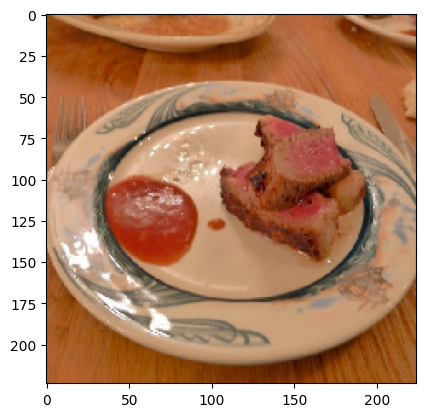

In [13]:
import matplotlib.pyplot as plt
plt.imshow(images[0])
labels[0].argmax()

### **Visualizing random images**

In [14]:
import random

In [15]:
def plot_random(path, _class):
  '''
  Plots random images of given class from the dataset of images.
  Args:
    path(str): path to the dataset of the images e.g: train or test
    _class(str): name of the specific class you wanna plot randomly of the dataset.
  Returns:
  A matplotlib plot of the random image.
  '''
  path=f"{path}/{_class}"
  rn=random.randint(0,len(path))
  images=os.listdir(path)
  image=plt.imread(f"{path}/{images[rn]}")
  plot=plt.imshow(image)
  return plot

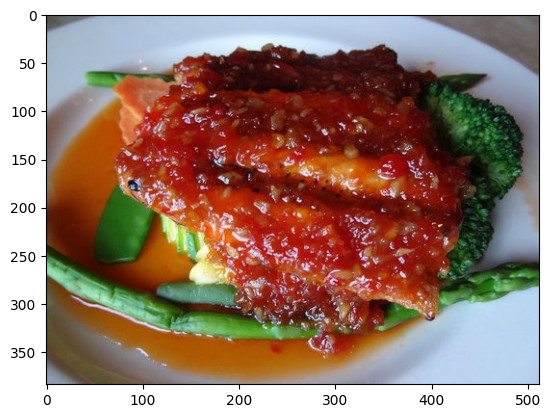

In [51]:
plot_random('10_food_classes_10_percent/train','grilled_salmon')

## **Modelling `MobileNetV2`**

In [52]:
import tensorflow as tf
import tensorflow_hub as hub

In [53]:
model_url='https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5'

In [54]:
mobile_net=hub.KerasLayer(model_url,
                          trainable=False,
                          input_shape=(224,224,3),
                          name='mobilenet_v2')

In [63]:
model=tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.Dense(10, activation='softmax')
])

In [64]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [65]:
history=model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 28s 1s/step - loss: 1.8838 - accuracy: 0.3693 - val_loss: 1.2747 - val_accuracy: 0.6204
Epoch 2/5
24/24 [==============================] - 22s 927ms/step - loss: 0.9853 - accuracy: 0.7307 - val_loss: 0.8868 - val_accuracy: 0.7348
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.7072 - accuracy: 0.8227 - val_loss: 0.7387 - val_accuracy: 0.7800
Epoch 4/5
24/24 [==============================] - 20s 854ms/step - loss: 0.5640 - accuracy: 0.8467 - val_loss: 0.6760 - val_accuracy: 0.7936
Epoch 5/5
24/24 [==============================] - 20s 848ms/step - loss: 0.4654 - accuracy: 0.8933 - val_loss: 0.6494 - val_accuracy: 0.7888


# ⭐ **Building a `tensorflow_hub` model for my custom data**
The model I selected for my dataset is [Resnet152](https://tfhub.dev/sayakpaul/bit_r152x2_224_feature_extraction/1).

**Note:**
This section can be run independently from the above code so you dont have to run the above code.

## **Getting and preprocessing the Data**
**About the data:**
The data contains two classes:
1. bolt
2. handsfree
containing 20 + images each equally...


In [74]:
!pip install gdown

In [76]:
!gdown -V

gdown 4.6.6 at /usr/local/lib/python3.10/dist-packages


In [78]:
!gdown --folder https://drive.google.com/drive/folders/10I5_N927bV5YSevzXPg9kRG8LyvKNpd1?usp=drive_link

Retrieving folder list
Retrieving folder 1Of3vE7XKcYQMkBgXvYFOcBqvTPEjoug0 bolt
Processing file 184HmwvxamUoKhn9xLFxo170qrp-RvXXM img_0 (1).jpg
Processing file 1HRNkDcCQGabiSvZCV2O-zFBFBFooFrQG img_0 (2).jpg
Processing file 1g2TTgnKeC1KGJtvNqowjH7E44HARCCJt img_0 (3).jpg
Processing file 1AOt4VIQCfnMX3gqS0xk5YB6jQEmw6Fc1 img_0 (4).jpg
Processing file 1l84UwKl9Gpkj9m0nQGNRzWKchwJC2enc img_0 (5).jpg
Processing file 1O4u19uSNVlx6JA7U5pxRiz0Rpmmg8mJ4 img_0 (6).jpg
Processing file 1Ls2XGeHaUOeV8VPiVezto1cQvD41nJ73 img_0 (7).jpg
Processing file 15pcYbqKojgC6V-027_vo3N8m2Bnd4zpM img_0 (8).jpg
Processing file 10Xah34OiZUmtACUEaYeQ4TRyGKZobIvj img_0 (9).jpg
Processing file 1WZvFTwuI6qOZyYruYUAUuemGblpLkUTo img_0 (10).jpg
Processing file 18n07ORkiFG087IhVl-kQ5bmBATNdWs0U img_0 (11).jpg
Processing file 1_lk2-3U3aR7AgVhq-hsExLmxY42uBy6r img_0 (12).jpg
Processing file 1gMBiN5fjldmthDkK_fObeaQMSLas75bY img_0 (13).jpg
Processing file 10yB6H46RCLXQOhGaxMaFL-Hz62TSjRmu img_0 (14).jpg
Processing file 1-w

In [79]:
train_dir='train'

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [81]:
train_datagen= ImageDataGenerator(rescale=1/255.)

In [82]:
train_data=train_datagen.flow_from_directory(train_dir,
                                             class_mode='binary',
                                             target_size=(224,224),
                                             )

Found 42 images belonging to 2 classes.


## **Getting familiar with the data**

In [101]:
for directory, folder, filename in os.walk('train'):
  print(f"There are {len(folder)} folders and {len(filename)} images in {directory}")

There are 2 folders and 0 images in train
There are 0 folders and 21 images in train/handsfree
There are 0 folders and 21 images in train/bolt


In [83]:
images,labels=train_data.next()

In [84]:
len(images)

32

In [85]:
images[0].shape

(224, 224, 3)

### **Plotting the randomly**

In [86]:
def plot_random(path, _class):
  '''
  Plots random images of given class from the dataset of images.
  Args:
    path(str): path to the dataset of the images e.g: train or test
    _class(str): name of the specific class you wanna plot randomly of the dataset.
  Returns:
  A matplotlib plot of the random image.
  '''
  path=f"{path}/{_class}"
  rn=random.randint(0,len(path))
  images=os.listdir(path)
  image=plt.imread(f"{path}/{images[rn]}")
  plot=plt.imshow(image)
  return plot

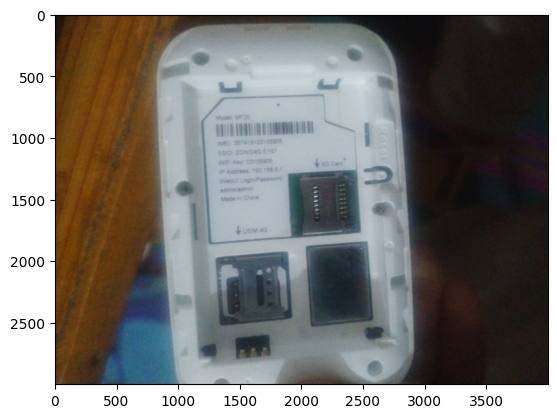

In [90]:
plot_random(train_dir,'bolt')

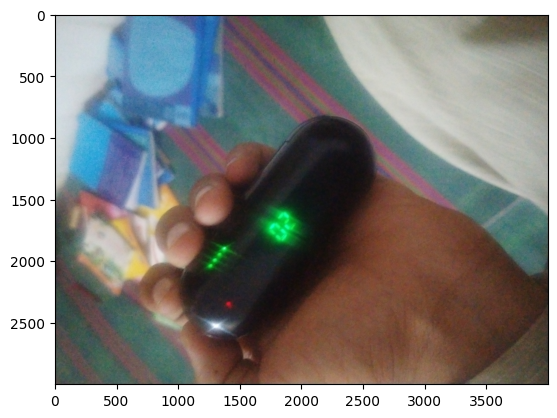

In [100]:
plot_random(train_dir, 'handsfree')

## **Modelling `Resnet152`**

In [113]:
import tensorflow_hub as hub
import tensorflow as tf

In [60]:
model_link='https://tfhub.dev/sayakpaul/bit_r152x2_224_feature_extraction/1'

In [103]:
resnet_152=hub.KerasLayer(model_link,
                          trainable=False,
                          name='resnet_152',
                          input_shape=(224,224,3))

In [107]:
model_1=tf.keras.Sequential([
    resnet_152,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [109]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [110]:
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data))

Epoch 1/5
2/2 [==============================] - 62s 3s/step - loss: 0.8438 - accuracy: 0.5476
Epoch 2/5
2/2 [==============================] - 9s 7s/step - loss: 0.5402 - accuracy: 0.7857
Epoch 3/5
2/2 [==============================] - 9s 7s/step - loss: 0.5349 - accuracy: 0.7381
Epoch 4/5
2/2 [==============================] - 10s 7s/step - loss: 0.3963 - accuracy: 0.7857
Epoch 5/5
2/2 [==============================] - 9s 1s/step - loss: 0.2204 - accuracy: 0.9048


## **Testing the model with custom images**

In [112]:
!wget -O image.jpg https://th.bing.com/th/id/OIP.kAZTLTcAQXluuAcHKJ_0JgAAAA?pid=ImgDet&w=239&h=319&rs=1

--2023-07-08 08:28:30--  https://th.bing.com/th/id/OIP.kAZTLTcAQXluuAcHKJ_0JgAAAA?pid=ImgDet
Resolving th.bing.com (th.bing.com)... 23.32.29.89, 125.56.219.18, 23.32.29.97, ...
Connecting to th.bing.com (th.bing.com)|23.32.29.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9876 (9.6K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]   9.64K  --.-KB/s    in 0s      

2023-07-08 08:28:30 (30.6 MB/s) - ‘image.jpg’ saved [9876/9876]



### **Processing the image to feed it to model**

In [122]:
def preprocess(path):
  '''
  Takes the image path and preprocess the image to be the same shape and rescale it.
  Args:
    path(str): path to the image file
  Returns:
  a resized and rescaled image.
  '''
  img=tf.io.read_file(path)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=(224,224))
  img=img/255.
  img=tf.expand_dims(img, axis=0)
  return img

In [123]:
preprocess('image.jpg')

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.55377275, 0.5106355 , 0.43220413],
         [0.55377275, 0.5106355 , 0.43220413],
         [0.55377275, 0.5106355 , 0.43220413],
         ...,
         [0.05785272, 0.05785272, 0.05000959],
         [0.0615196 , 0.0615196 , 0.05367646],
         [0.06271724, 0.06271724, 0.05487411]],

        [[0.5568628 , 0.5137255 , 0.43529412],
         [0.5568628 , 0.5137255 , 0.43529412],
         [0.5568628 , 0.5137255 , 0.43529412],
         ...,
         [0.051333  , 0.051333  , 0.04348986],
         [0.05593487, 0.05593487, 0.04809173],
         [0.060119  , 0.060119  , 0.05227587]],

        [[0.56078434, 0.5176471 , 0.4392157 ],
         [0.56078434, 0.5176471 , 0.4392157 ],
         [0.56078434, 0.5176471 , 0.4392157 ],
         ...,
         [0.04158781, 0.04158781, 0.03374468],
         [0.04642856, 0.04642856, 0.03858542],
         [0.0541745 , 0.0541745 , 0.04633136]],

        ...,

        [[0.20392948, 0.09020399, 

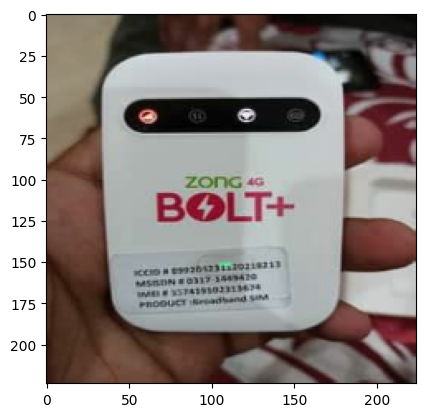

In [120]:
plt.imshow(preprocess('image.jpg'))

In [124]:
model_1.predict(preprocess('image.jpg'))

1/1 [==============================] - 6s 6s/step


array([[0.06439622]], dtype=float32)

### **Decoding the predictions**

In [125]:
def decode_pred(pred):
  '''
  Tells the predicted class of the model
  Args:
    pred(array): Model's prediction
  Returns:
    A statement about the prediction
  '''
  if tf.round(pred)!=1:
    print("The model has predicted this picture as ||Bolt||.")
  else:
    print("The model has predicted this picture as ||Handsfree/Earbuds||")

In [128]:
decode_pred(model_1.predict(preprocess('image.jpg')))

1/1 [==============================] - 0s 140ms/step
The model has predicted this picture as ||Bolt||.


### **Lets try another image**

In [129]:
!wget -O image_2.jpg https://www.thetechtoys.com/wp-content/uploads/2020/06/best-truly-wireless-earbuds-in-budget-compressed.jpg

--2023-07-08 08:47:40--  https://www.thetechtoys.com/wp-content/uploads/2020/06/best-truly-wireless-earbuds-in-budget-compressed.jpg
Resolving www.thetechtoys.com (www.thetechtoys.com)... 104.21.3.16, 172.67.130.8, 2606:4700:3036::ac43:8208, ...
Connecting to www.thetechtoys.com (www.thetechtoys.com)|104.21.3.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39456 (39K) [image/jpeg]
Saving to: ‘image_2.jpg’

image_2.jpg         100%[===================>]  38.53K  --.-KB/s    in 0s      

2023-07-08 08:47:41 (135 MB/s) - ‘image_2.jpg’ saved [39456/39456]



In [130]:
image=preprocess('image_2.jpg')

In [131]:
pred= model_1.predict(image)

1/1 [==============================] - 0s 150ms/step


In [132]:
decode_pred(pred)

The model has predicted this picture as ||Handsfree/Earbuds||


**WOHOOOO!!!! The model works great...**

# ✅ ***DONE!!!!***